In [1]:
# Common stuff reused by all applications
from analysis_common import *
%matplotlib inline


EXPERIMENT_SIZE_FIELDS = [
    "n_blocks_fit",
    "n_blocks_nn",
    "points_per_block",
]

PLATFORM_FIELDS = [
    "nodes",
    "cpus_per_node",
    "backends_per_node",
]

HANDPICKED_OUTLIERS = []

In [2]:
db = DataStorage("nn-split")
df = prepare_df(db, HANDPICKED_OUTLIERS)

df.query("start_ts > '2022-06-01'", inplace=True)

# Some bogus executions when testing copy stuff flags
df.query("(id < 24082000) or (id > 24083000)", inplace=True)

# I botched up a series of execution that are useless
df.query("n_blocks_fit >= ((nodes - 1) * 2)", inplace=True)

In [3]:
edf = df.explode("kneighbors_time").sort_values('mode')
edf['kneighbors_time'] = edf['kneighbors_time'].astype(float)
edf['fit_time'] = edf['fit_time'].astype(float)
edf['nodes'] = edf['nodes'].astype(int)

winsorize_edf(edf, "kneighbors_time", ["mode", "nodes", "n_blocks_fit", "n_blocks_nn", "points_per_block"])
winsorize_edf(edf, "fit_time", ["mode", "nodes", "n_blocks_fit", "n_blocks_nn", "points_per_block"])

/home/alex/BSC/split-miniapps/analysis/analysis_common.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df[mask] = mstats.winsorize(working_df[mask], limits=[0, 0.1])


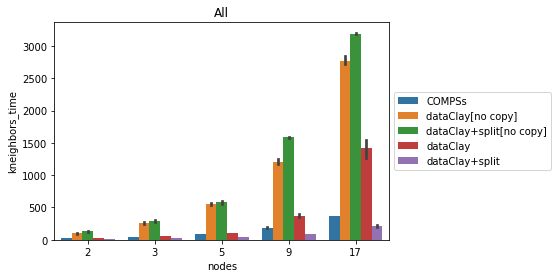

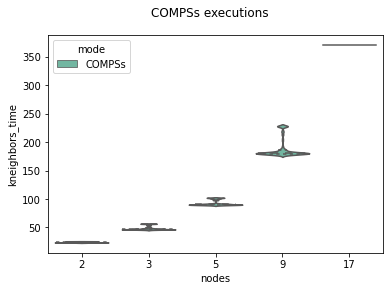

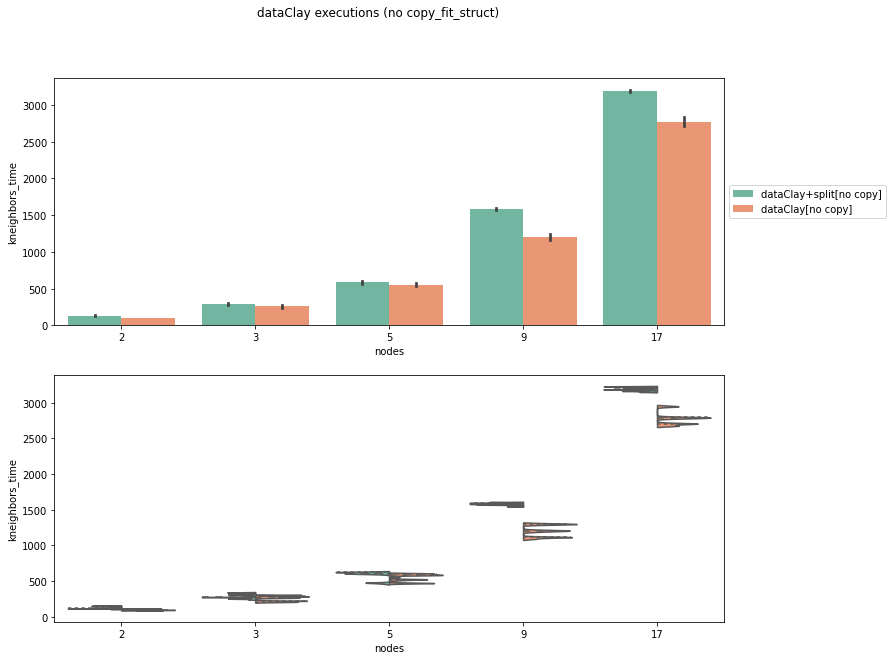

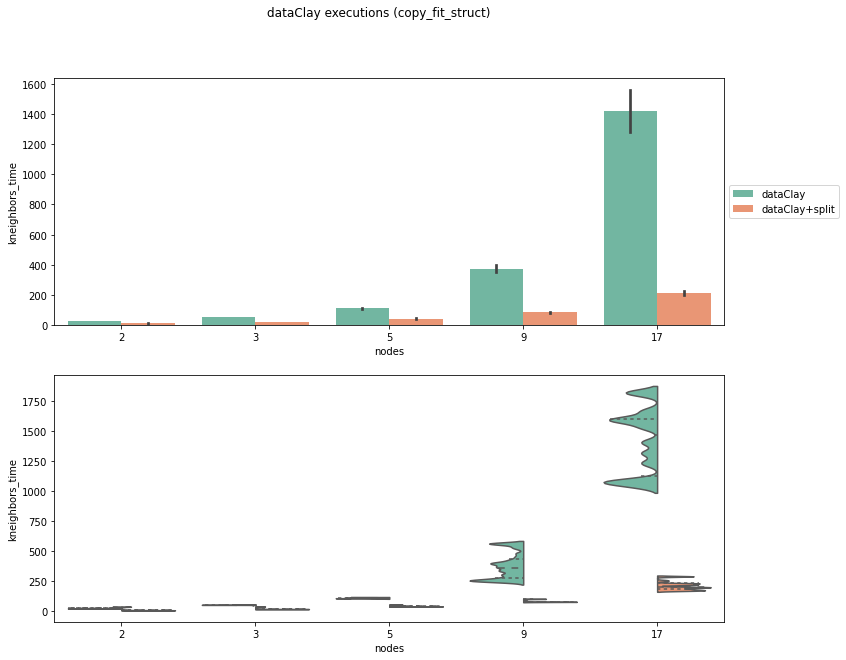

id  dataclay  use_split  \
nodes mode                                                         
2     COMPSs                   2.401039e+07       0.0        0.0   
      dataClay                 2.400638e+07       1.0        0.0   
      dataClay+split           2.400638e+07       1.0        1.0   
      dataClay+split[no copy]  2.408346e+07       1.0        1.0   
      dataClay[no copy]        2.408343e+07       1.0        0.0   
3     COMPSs                   2.401041e+07       0.0        0.0   
      dataClay                 2.400640e+07       1.0        0.0   
      dataClay+split           2.400640e+07       1.0        1.0   
      dataClay+split[no copy]  2.408344e+07       1.0        1.0   
      dataClay[no copy]        2.408344e+07       1.0        0.0   
5     COMPSs                   2.401042e+07       0.0        0.0   
      dataClay                 2.400641e+07       1.0        0.0   
      dataClay+split           2.401329e+07       1.0        1.0   
      dataClay+split[no copy]  2.408345e+07       1.0        1.0   
      dataClay[no copy]        2.408344e+07       1.0        0.0   
9     COMPSs                   2.420476e+07       0.0        0.0   
      dataClay                 2.429932e+07       1.0        0.0   
      dataClay+split           2.426927e+07       1.0        1.0   
      dataClay+split[no copy]  2.408348e+07       1.0        1.0   
      dataClay[no copy]        2.408348e+07       1.0        0.0   
17    COMPSs                   2.403051e+07       0.0        0.0   
      dataClay                 2.410129e+07       1.0        0.0   
      dataClay+split           2.392135e+07       1.0        1.0   
      dataClay+split[no copy]  2.408348e+07       1.0        1.0   
      dataClay[no copy]        2.408348e+07       1.0        0.0   

                               backends_per_node  cpus_per_node  \
nodes mode                                                        
2     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
3     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
5     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
9     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
17    COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   

                               computing_units  initialization_time  \
nodes mode                                                            
2     COMPSs                               1.0            13.344392   
      dataClay                             1.0            43.254162   
      dataClay+split                       1.0            43.008473   
      dataClay+split[no copy]          

In [4]:
data = edf.query('(nodes - 1) * 6 == n_blocks_fit')
kneighbors_data = data.copy()
kneighbors_data["nodes"] -= 1


hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split"]
plot_things(data, "kneighbors_time", hue_order=hue_order)

# sns.barplot(data=data, x="nodes", hue="mode", y="kneighbors_time")
# plt.title("6 blocks per node")
# plt.show()

data.groupby(["nodes", "mode"]).mean()

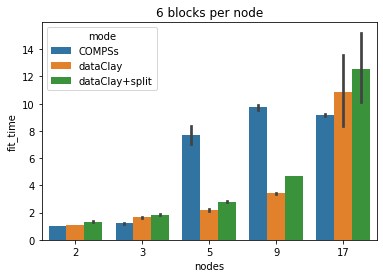

In [5]:
data = edf.query('(nodes - 1) * 2 == n_blocks_fit')
sns.barplot(data=data, x="nodes", hue="mode", y="fit_time")
plt.title("6 blocks per node")
plt.show()

In [6]:
data

,id,start_ts,finish_ts,dataclay,use_split,nodes,backends_per_node,cpus_per_node,computing_units,initialization_time,fit_time,kneighbors_time,rotation_time,execution_time,split_overhead_time,points_per_block,n_blocks_fit,n_blocks_nn,use_local,num_threads,tracing,compss_scheduler,compss_working_dir,copy_fit_struct,mode
709,25442311,2022-10-07 21:34:57.164127,2022-10-07 21:38:25.352176,0.0,0.0,5,2.0,48.0,1.0,13.117435,9.073919,19.564595,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
709,25442311,2022-10-07 21:34:57.164127,2022-10-07 21:38:25.352176,0.0,0.0,5,2.0,48.0,1.0,13.117435,9.073919,18.379022,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
710,25442317,2022-10-07 21:40:19.032481,NaT,0.0,0.0,5,2.0,48.0,1.0,13.789135,9.155218,24.755578,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
710,25442317,2022-10-07 21:40:19.032481,NaT,0.0,0.0,5,2.0,48.0,1.0,13.789135,9.155218,22.521826,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
710,25442317,2022-10-07 21:40:19.032481,NaT,0.0,0.0,5,2.0,48.0,1.0,13.789135,9.155218,23.471890,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
710,25442317,2022-10-07 21:40:19.032481,NaT,0.0,0.0,5,2.0,48.0,1.0,13.789135,9.155218,22.317671,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
711,25442320,2022-10-07 22:32:02.664896,2022-10-07 22:35:20.945830,0.0,0.0,5,2.0,48.0,1.0,13.177444,8.884150,20.995810,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
711,25442320,2022-10-07 22:32:02.664896,2022-10-07 22:35:20.945830,0.0,0.0,5,2.0,48.0,1.0,13.177444,8.884150,19.572115,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
711,25442320,2022-10-07 22:32:02.664896,2022-10-07 22:35:20.945830,0.0,0.0,5,2.0,48.0,1.0,13.177444,8.884150,19.732261,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs
710,25442317,2022-10-07 21:40:19.032481,NaT,0.0,0.0,5,2.0,48.0,1.0,13.789135,9.155218,22.925601,[],None,None,500000.0,8.0,48.0,None,1.0,0.0,es.bsc.compss.scheduler.fifodatanew.FIFODataScheduler,gpfs,0.0,COMPSs


Remember: when evaluating split overhead, the overhead is not only the split but also the added cost of fit.

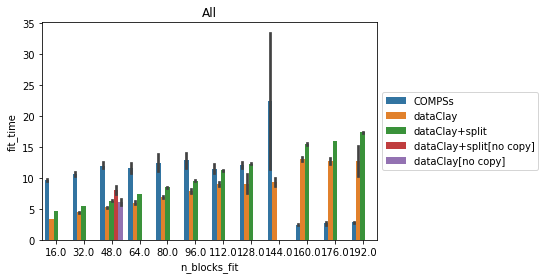

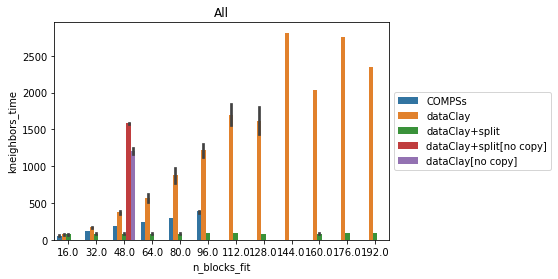

In [7]:
# Some random scalability whatevers, explain it better
data = edf.query("(nodes == 9)")

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="fit_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="kneighbors_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()


In [8]:
mean_data = data.query("copy_fit_struct != 0").query("n_blocks_fit < 100").groupby(["n_blocks_fit", "mode"]).mean()

In [9]:
from math import log2

for (n_blocks_fit, mode), values in mean_data.iterrows():
    if mode == "COMPSs":
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]
    else:
        #mean_data.at[(n_blocks_fit, mode), "speedup"] = mean_data.at[(n_blocks_fit, "COMPSs"), "kneighbors_time"] / values["kneighbors_time"]
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]

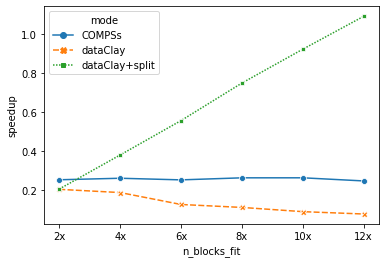

In [10]:
ax = sns.lineplot(data=mean_data, style="mode", markers=True, x="n_blocks_fit", hue="mode", y="speedup")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])
#ax.set(yscale='log')
plt.show()

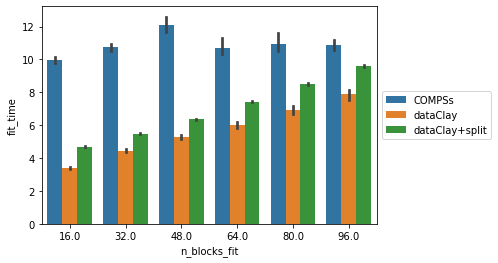

id  dataclay  use_split  nodes  \
n_blocks_fit mode                                                       
16.0         COMPSs          2.387327e+07       0.0        0.0    9.0   
             dataClay        2.493056e+07       1.0        0.0    9.0   
             dataClay+split  2.490692e+07       1.0        1.0    9.0   
32.0         COMPSs          2.385927e+07       0.0        0.0    9.0   
             dataClay        2.437022e+07       1.0        0.0    9.0   
             dataClay+split  2.434570e+07       1.0        1.0    9.0   
48.0         COMPSs          2.387857e+07       0.0        0.0    9.0   
             dataClay        2.429932e+07       1.0        0.0    9.0   
             dataClay+split  2.426927e+07       1.0        1.0    9.0   
64.0         COMPSs          2.385696e+07       0.0        0.0    9.0   
             dataClay        2.459384e+07       1.0        0.0    9.0   
             dataClay+split  2.442320e+07       1.0        1.0    9.0   
80.0         COMPSs          2.383568e+07       0.0        0.0    9.0   
             dataClay        2.482723e+07       1.0        0.0    9.0   
             dataClay+split  2.443522e+07       1.0        1.0    9.0   
96.0         COMPSs          2.380918e+07       0.0        0.0    9.0   
             dataClay        2.472052e+07       1.0        0.0    9.0   
             dataClay+split  2.434906e+07       1.0        1.0    9.0   

                             backends_per_node  cpus_per_node  \
n_blocks_fit mode                                               
16.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
32.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
48.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
64.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
80.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
96.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   

                             computing_units  initialization_time   fit_time  \
n_blocks_fit mode                                                              
16.0         COMPSs                      1.0            15.191243   9.962896   
             dataClay                    1.0           134.091183   3.405518   
             dataClay+split              1.0           134.806372   4.690578   
32.0         COMPSs                      1.0            15.549903  10.734571   
             dataClay                    1.0           155.630850   4.448966   
             dataClay+split              1.0           154.589078   5.489210   
48.0         COMPSs                      1.0            16.266992  12.103246   
             dataClay                    1.0           166.057354   5.285563   
             dataClay+split              1.0           165.346927   6.352359   
64.0         COMPSs                      1.0            14.954920  10.721653   
             dataClay                    1.0           176.202112   6.036662   
             dataClay+split              1.0           175.974753   7.439373   
80.0         COMPSs                      1.0            14.849727  10.954114   
             dataClay                    1.0           187.223262   6.909216 

In [11]:
data = edf.query("(nodes == 9) and (copy_fit_struct != 0) and (((nodes - 1) * 12) >= n_blocks_fit)")
sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="fit_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="kneighbors_time")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

data.groupby(["n_blocks_fit", "mode"]).mean()

# Figure generation

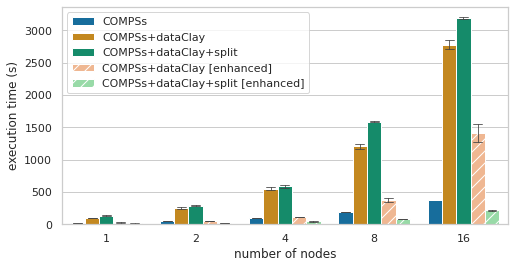

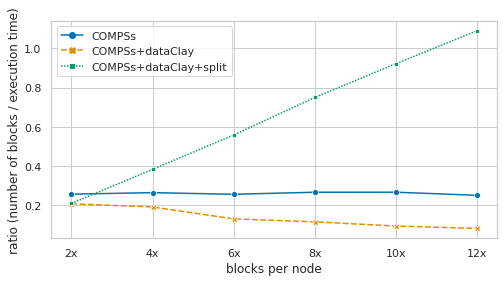

In [12]:
sns.set(style="whitegrid", color_codes=True)

hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split"]

ax = sns.barplot(y="kneighbors_time", x="nodes", hue="mode",
                 data=kneighbors_data,
                 capsize=0.1,
                 errwidth=0.8,
                 hue_order=hue_order,
                 palette=sns.color_palette("colorblind")[:3] + sns.color_palette("pastel")[1:3])

for i, bar in enumerate(ax.patches):
    if (i > 14):  # experimentally found the proper value == 14
        bar.set_hatch('//')

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "COMPSs+dataClay", "COMPSs+dataClay+split", 
              "COMPSs+dataClay [enhanced]", "COMPSs+dataClay+split [enhanced]"])
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

save_tweaks("kneighbors-weakscaling.pdf")
plt.show()

ax = sns.lineplot(data=mean_data, style="mode", 
                  markers=True, x="n_blocks_fit", 
                  hue="mode", y="speedup", 
                  palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "COMPSs+dataClay", "COMPSs+dataClay+split"])
ax.set_ylabel("ratio (number of blocks / execution time)")
ax.set_xlabel("blocks per node")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])

save_tweaks("kneighbors-grow.pdf")
plt.show()

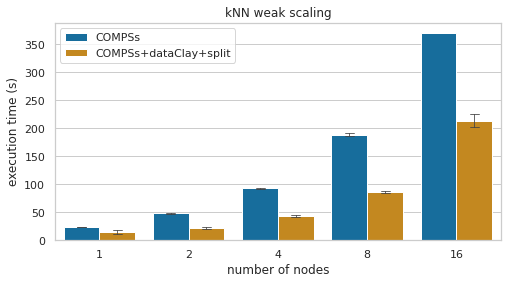

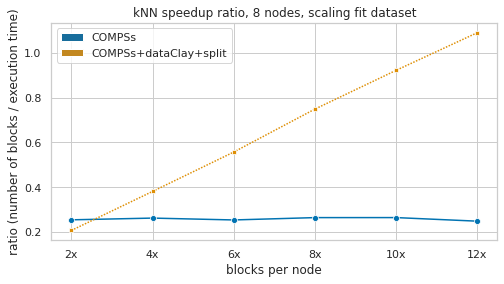

In [13]:
hue_order=["COMPSs", "dataClay+split"]

ax = sns.barplot(y="kneighbors_time", x="nodes", hue="mode",
                 data=kneighbors_data,
                 capsize=0.1,
                 errwidth=0.8,
                 hue_order=hue_order,
                 palette="colorblind")

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "COMPSs+dataClay+split"])
ax.set_title("kNN weak scaling")
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

save_tweaks("knn-anotherpresentation.png")
plt.show()

ax = sns.lineplot(data=mean_data, style="mode", 
                  markers=True, x="n_blocks_fit", 
                  hue="mode", y="speedup", 
                  hue_order=hue_order,
                  palette="colorblind")

ax.legend().title = ""
ax.set_ylabel("ratio (number of blocks / execution time)")
ax.set_xlabel("blocks per node")
ax.legend(h, ["COMPSs", "COMPSs+dataClay+split"])
ax.set_title("kNN speedup ratio, 8 nodes, scaling fit dataset")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])

save_tweaks("kneighbors-anotherpresentationgrow.png")
plt.show()


# Characterization and time distribution

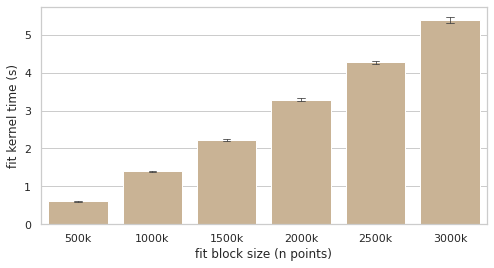

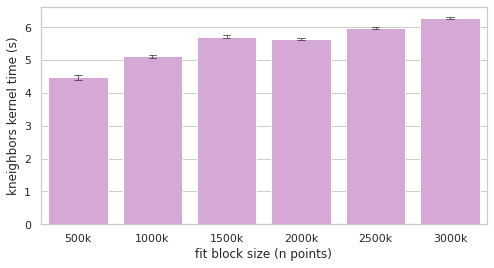

In [19]:
df = pd.read_csv("data_nn_benchmark.csv")
ax = sns.barplot(x="multiplier", y="fit", data=df,
                 capsize=0.1, errwidth=0.8,
                 color="tan")

ax.set_ylabel("fit kernel time (s)")
ax.set_xlabel("fit block size (n points)")
ax.set_xticklabels(["500k", "1000k", "1500k", "2000k", "2500k", "3000k"])

save_tweaks("kneighbors-kernel-fit.pdf")

plt.show()

ax = sns.barplot(x="multiplier", y="kneighbors", data=df,
                 capsize=0.1, errwidth=0.8,
                 color="plum")

ax.set_ylabel("kneighbors kernel time (s)")
ax.set_xlabel("fit block size (n points)")
ax.set_xticklabels(["500k", "1000k", "1500k", "2000k", "2500k", "3000k"])

save_tweaks("kneighbors-kernel-kneighbors.pdf")

plt.show()


## Projection

In [15]:
vals = df.groupby(["multiplier"]).mean()
vals

,fit,kneighbors
multiplier,,
1,0.605050,4.470842
2,1.393670,5.115471
3,2.220747,5.707581
4,3.280972,5.635106
5,4.266676,5.972647
6,5.380411,6.277319


In [16]:
def eval_and_print(n_fits, size_fit):
    
    time_fit = vals["fit"][size_fit]
    agg_fit = time_fit * (n_fits // size_fit)
    time_kn = vals["kneighbors"][size_fit] * (n_fits // size_fit)
    agg_kn = time_kn * 24
    total = time_fit + time_kn
    ratio = time_fit / total * 100
    print("& %d & %.2f & %.2f & %.2f & %.2f & %.2f & %.1f\\%% \\\\" % (size_fit, agg_fit, time_fit, agg_kn, time_kn, total, ratio))
    

print("24 blocks, 1 fit")
eval_and_print(1, 1)

print("24 blocks, 2 fit")

eval_and_print(2, 2)
eval_and_print(2, 1)

print("24 blocks, 4 fit")

eval_and_print(4, 4)
eval_and_print(4, 2)
eval_and_print(4, 1)

print("24 blocks, 6 fit")

eval_and_print(6, 6)
eval_and_print(6, 3)
eval_and_print(6, 2)
eval_and_print(6, 1)

24 blocks, 1 fit
& 1 & 0.61 & 0.61 & 107.30 & 4.47 & 5.08 & 11.9\% \\
24 blocks, 2 fit
& 2 & 1.39 & 1.39 & 122.77 & 5.12 & 6.51 & 21.4\% \\
& 1 & 1.21 & 0.61 & 214.60 & 8.94 & 9.55 & 6.3\% \\
24 blocks, 4 fit
& 4 & 3.28 & 3.28 & 135.24 & 5.64 & 8.92 & 36.8\% \\
& 2 & 2.79 & 1.39 & 245.54 & 10.23 & 11.62 & 12.0\% \\
& 1 & 2.42 & 0.61 & 429.20 & 17.88 & 18.49 & 3.3\% \\
24 blocks, 6 fit
& 6 & 5.38 & 5.38 & 150.66 & 6.28 & 11.66 & 46.2\% \\
& 3 & 4.44 & 2.22 & 273.96 & 11.42 & 13.64 & 16.3\% \\
& 2 & 4.18 & 1.39 & 368.31 & 15.35 & 16.74 & 8.3\% \\
& 1 & 3.63 & 0.61 & 643.80 & 26.83 & 27.43 & 2.2\% \\
